In [1]:
import sys
sys.path.insert(0, '../../TSProject/')

import random as rd
import math as mt
from algorithms import fabian_bruteForce as fabBF
#from algorithms import brute_force_marco as marBF
import graph_class as gc
import ALGO_brute_force as eduBF

In [2]:
def createCoords(nCoords):
    coords = [[rd.randint(1,100),rd.randint(1,100)] for x in range(nCoords)]
    return coords

In [3]:
import numpy as np
from scipy.spatial.distance import pdist

__author__ = "Fabian Walocha"
__copyright__ = "Copyright 2018"
__status__ = "Prototype"

# Transforms coordinates input into an adjacency matrix
def coordWrapper(coords):
    adj_mat = np.zeros([len(coords),len(coords)])
    for idx in range(len(coords)):
        adj_mat[idx,idx] = np.inf
        for idx2 in range(idx+1,len(coords)):
            adj_mat[idx,idx2] = np.linalg.norm(np.array(coords[idx])-np.array(coords[idx2]))
            adj_mat[idx2,idx] = np.linalg.norm(np.array(coords[idx2])-np.array(coords[idx]))
    return adj_mat

In [4]:
coords = createCoords(4)

In [8]:
highN = 11
lowN = 6
t1 = np.zeros([highN-lowN,1])
t2 = np.zeros([highN-lowN,1])
t3 = np.zeros([highN-lowN,1])
t4 = np.zeros([highN-lowN,1])

for idx in range(lowN,highN):
    coords = createCoords(idx)
    mat = coordWrapper(coords)
    graph = gc.fully_connected_graph_from_coordinate_list(coords,)
    
    resF, stuff, t1[idx-lowN] = fabBF.bruteForce(mat, 
                                                 symmetric=True, 
                                                 timed=True,
                                                 preload=False)
    #t2[idx-lowN], resK = kriBF.bruteForce(coords)
    #t3[idx-lowN], resM = marBF.bruteForce(coords)
    t4[idx-lowN], resE, dummy = eduBF.brute_force(graph, 
                                                  max_iterations=mt.factorial(idx), 
                                                  return_graph=False)
    
    print("For", idx, "nodes:",resF, resE)

For 6 nodes: 276.79914621802106 277
For 7 nodes: 218.5702928444312 220
For 8 nodes: 229.567055146152 230
For 9 nodes: 231.6575087920999 231
For 10 nodes: 271.5186326185898 270


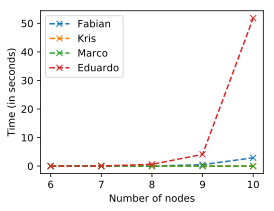

In [9]:
%config InlineBackend.figure_format = 'svg'

highN = 11
lowN = 6

from matplotlib import pyplot as plt
vals = np.transpose(np.squeeze([t1,t2,t3,t4]))
plt.figure(figsize=(4,3))
plt.plot(range(lowN,highN),list(vals), '--x')
plt.legend(['Fabian','Kris','Marco','Eduardo'])
plt.xlabel('Number of nodes')
plt.ylabel('Time (in seconds)')
plt.show()

In [7]:
vals

array([[4.99725342e-04, 8.98337364e-03, 4.99010086e-03, 3.99279594e-03],
       [3.99231911e-03, 7.53595829e-02, 4.24203873e-02, 3.09426785e-02],
       [3.34198475e-02, 7.40604639e-01, 3.33396435e-01, 2.89462090e-01],
       [2.51530409e-01, 7.61281061e+00, 3.33329463e+00, 2.75686598e+00],
       [1.96084833e+00, 9.46842349e+01, 3.76558812e+01, 3.04343605e+01]])

In [8]:
a = np.array([0,1,1,0,1,1,0])
b = np.array([1,0,0,1,0,0,0])
[i for i,x in enumerate(a==b) if x]

[6]